Для разных Ht = 60, 80, 100
перебор n получить B и G при условии прочности и устойчивости

In [1]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [2]:
#constant
const_pi = 3.1415

#dam profile
B = 60
n = 0.4  #0.1 - 0.5
Ht = 60 #height of triangle profile
H2 = 105.2 - 98 # = 7.2 meters

#section profile
b = Ht * 0.15 #meters
D = 20 #meters
d = 10 #meters
#coast:
Bc = 10 #meters

#reservoir
hw = 0.8 #meters
W_ice = 10 #in tons / m
h_ice = 1 #in meters
H_allu = 24 #in meters - Alluvium layer thickness

#density
dens_c = 2.4 #tons / m ** 3 - Concrete
dens_w = 1 #ton / m ** 3 - Water
dens_allu = 1.05 #tons / m ** 3 - Alluvium

#criteria
sigma_a = 1000 #tons / m**2

#secondary data
Lw = 11 * hw #in meters
dhw = const_pi * hw ** 2 / Lw #in meters
m = B / Ht - n
dc = hw + dhw + 0.6 #meters
ec = 1 #meters

B = 60
n = 0.4
m = 0.6
dc = 1.6284727272727273
F = 716.9258240356726
x_A = 26.077545434775875
x_B = 33.92245456522413
Jy = 238069.49037330007
W_A = 9129.29059863974
W_B = 7018.0502391285945

Own weight
G1 = 43200.0
G2 = 16837.318661136844
G3 = 781.6669090909091
G4 = 960.0
G5 = -959.9999999999999
G6 = -817.4798512374274

l1 = 1.9224545652241243
l2 = -8.127912362768209
l3 = -1.0775454347758746
l4 = -4.744212101442541
l5 = 4.2557878985574575
l6 = 9.042923721469545

a1 = 4.0
a2 = 6.0
a* = 17.21477405871346
b* = -12.30761937235863
n1 = 0.76

M1 = 83050.03721768217
M2 = -136852.250501722 = 172.39581782596574 and 17.67675231531484
M3 = -842.2816094062778
M4 = -4554.443617384839
M5 = -4085.556382615159, M5_1 = 2.6666666666666674
M6 = -7392.407938578328 brackets = 1.9155570731866105, -5.451877645862224, -8.212697069407767, -123.20679897630546

Water pressure
W upper horizontal = 36000.0
W upper vertical = 14400.0
W lower horizontal = -518.4000000000004
W lower vertical = 51.84000000000003
M upp

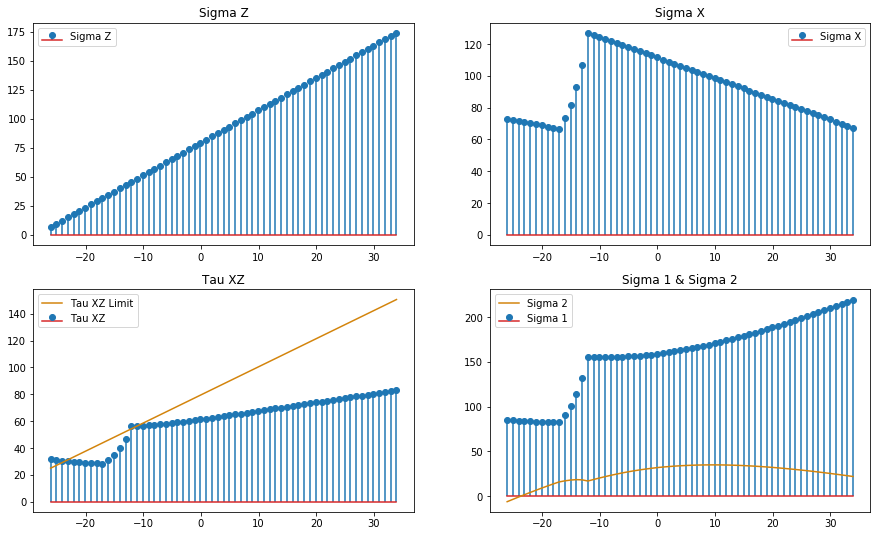

60001.50571899033

In [3]:
def static_calc(output="G", print_init=False, print_var=False, print_results=False, plots=False):
    
    Lw = 11 * hw #in meters
    dhw = const_pi * hw ** 2 / Lw #in meters
    m = B / Ht - n
    dc = hw + dhw + 0.6 #meters
    #ec = 0.5 #meters
    
    sqrt1n = sqrt(1 + n ** 2)
    a = (D - d) / 2
    F = B * d + a * (2 * b + a * sqrt1n)
    
    x_cm = (0.5 * B ** 2 * d + a * b ** 2 + a ** 2 * (b + a * sqrt1n / 3) * sqrt1n) / F
    x_B = B - x_cm
    
    Jy_list = [0, 0, 0, 0, 0, 0]
    Jy_list[0] = B ** 3 * d / 12
    Jy_list[1] = a * b ** 3 / 6
    Jy_list[2] = a ** 4 / 18 * sqrt1n ** 1.5
    Jy_list[3] = (x_cm - 0.5 * B) ** 2 * B * d
    Jy_list[4] = 2 * (x_cm - 0.5 * b) ** 2 * a * b
    Jy_list[5] = a ** 2 *(x_cm - b - a * sqrt1n / 3) ** 2 * sqrt1n
    
    Jy = 0
    for item in Jy_list:
        Jy += item
        
    W_A = Jy / x_cm
    W_B = Jy / x_B
    
    if print_init == True:
        print(f"B = {B}")
        print(f"n = {n}")
        print(f"m = {m}")
        print(f"dc = {dc}")
        print(f"F = {F}")
        print(f"x_A = {x_cm}")
        print(f"x_B = {x_B}")
        print(f"Jy = {Jy}")
        print(f"W_A = {W_A}")
        print(f"W_B = {W_B}", end="\n\n")
        
    #Own weight
        
    G1 = 0.5 * dens_c * B * Ht * d
    M1 = dens_c * Ht * B * d * (B - 3 * x_cm + n * Ht) / 6

    G2 = dens_c * Ht * (a * sqrt1n + 2 * b) * a
    M2_1 = b * (2 * x_cm - b - n * Ht)
    M2_2 = a * sqrt1n * (x_cm - b - (n * Ht) / 2 - (a * sqrt1n) / 3)
    M2 = -dens_c * Ht * a * (M2_1 + M2_2)

    G3 = dens_c * Bc * D * dc
    M3 = -G3 * (x_cm - n * Ht - ec)

    a1 = (0.5 * Bc - ec)
    G4 = 0.5 * dens_c * D * a1 ** 2 / n
    M4 = -G4 * (x_cm - n * Ht + (2 * a1) / 3)

    a2 = (0.5 * Bc + ec)
    G5 = -0.5 * dens_c * n * D * a2 ** 2 / m ** 2
    M5_1 = 2 * n * a2 / (3 * m)
    M5 = -G5 * (x_cm - b - n * Ht + M5_1)

    a_star = a2 * (b + a * sqrt1n) * sqrt1n / (m * b)
    b_star = x_cm - b - n * Ht - a * sqrt1n
    n_1 = 1 - n * m / (n + m)
    G6_1 = a_star - (2 * a * sqrt1n * Ht) / (3 * B)
    G6 = -dens_c * a ** 2 * G6_1
    
    sqrt1n_1 = sqrt(1 + n_1 ** 2)
    M6_1 = n * (2 + n ** 2) / sqrt1n + n_1 * (2 - n ** 2) / sqrt1n_1
    M6_2 = n * n_1 * a_star + (n + n_1) * b_star + 3 * a * M6_1 / 8
    M6_2_2 = b_star + n * a / 2 + 2 * a / (3 * sqrt1n)
    M6_3 = a_star * M6_2_2 - 2 * a * M6_2 / 3
    M6 = dens_c * a ** 2 * M6_3

    if print_var == True:
        print("Own weight")
        print(f"G1 = {G1}")
        print(f"G2 = {G2}")
        print(f"G3 = {G3}")
        print(f"G4 = {G4}")
        print(f"G5 = {G5}")
        print(f"G6 = {G6}", end="\n\n")
        
        print(f"l1 = {M1 / G1}")
        print(f"l2 = {M2 / G2}")
        print(f"l3 = {M3 / G3}")
        print(f"l4 = {M4 / G4}")
        print(f"l5 = {M5 / G5}")
        print(f"l6 = {M6 / G6}", end="\n\n")
        
        print(f"a1 = {a1}")
        print(f"a2 = {a2}")
        print(f"a* = {a_star}")
        print(f"b* = {b_star}")
        print(f"n1 = {n_1}", end="\n\n")
        
        print(f"M1 = {M1}")
        print(f"M2 = {M2} = {M2_1} and {M2_2}")
        print(f"M3 = {M3}")
        print(f"M4 = {M4}")
        print(f"M5 = {M5}, M5_1 = {M5_1}")
        print(f"M6 = {M6} brackets = {M6_1}, {M6_2}, {M6_2_2}, {M6_3}", end="\n\n")
        
    #Water pressure
    #upper horizontal
    
    H1 = Ht
    W_uphor = 0.5 * dens_w * H1 ** 2 * D
    M_uphor = dens_w * H1 ** 3 * D / 6

    #upper vertical
    W_upvert = n * W_uphor
    M_upvert = -dens_w * n * D * H1 ** 2 * (3 * x_cm - n * H1) / 6

    #lower horizontal
    W_lowhor = -0.5 * dens_w * H2 ** 2 * D
    M_lowhor = W_lowhor * H2 / 3

    #lower vertical
    W_lowvert = (n - B * d / (Ht * D)) * W_lowhor
    M_lowvert_1 = x_cm - b - a / 2 - n * H2 / 3
    M_lowvert_2 = x_B - m * H2
    M_lowvert_3 = 2 * n * a * M_lowvert_1 + m * M_lowvert_2 * d
    M_lowvert = M_lowvert_3 * W_lowvert / D
    
    #Anti-pressure
    U1 = -dens_w * H2 * (D * b + a * (D + d) / 2 + (B - b - a) * d)
    M_U1 = 0
    U2 = -dens_w * (H1 - H2) * (b + a) * D
    M_U2 = -U2 * (x_cm - (b + a) / 2)
    
    #Alluvium pressure
    W_alluhor = 0.5 * dens_allu * H_allu ** 2 * D
    M_alluhor = W_alluhor * H_allu / 3

    W_alluvert = 0.5 * dens_allu * n * H_allu ** 2 * D
    M_alluvert = -W_alluvert *  (x_cm - n * H_allu / 3)
    
    #Wave pressure
    W_wavhor = dens_w * hw * (Lw / const_pi + hw / 2) * D / 2
    M_wavhor = W_wavhor * (H1 - Lw / (2 * const_pi) + 3 * hw / 8)

    W_wavvert = W_wavhor * n
    
    if print_var == True:
        print("Water pressure")
        print(f"W upper horizontal = {W_uphor}")
        print(f"W upper vertical = {W_upvert}")
        print(f"W lower horizontal = {W_lowhor}")
        print(f"W lower vertical = {W_lowvert}")
        
        print(f"M upper horizontal = {M_uphor}")
        print(f"M upper vertical = {M_upvert}")
        print(f"M lower horizontal = {M_lowhor}")
        print(f"M lower vertical = {M_lowvert}")
        
        print(f"Suspending force = {U1}")
        print(f"Filtering part = {U2}")
        print(f"Filtering part moment = {M_U2}")
        
        print(f"Alluvium vertical = {W_alluvert}")
        print(f"Alluvium vertical moment = {M_alluvert}")
        print(f"Alluvium horizontal = {W_alluhor}")
        print(f"Alluvium horizontal moment = {M_alluvert}")
        
        print(f"Wave pressure horizontal part = {W_wavhor}")
        print(f"Wave pressure moment = {M_wavhor}")
        print(f"Wave pressure vertical part = {W_wavvert}")
        
        
        print("")
        
#Construction period - reservoir empty

    N = G1 + G2 + G3 + G4 + G5 + G6
    Qsummer = None
    Msummer = M1 + M2 + M3 + M4 + M5 + M6

    if print_results == True:
        print("Summary")
        print("Construction period")
        print(f"N = {G1 + G2 + G3 + G4 + G5 + G6}")
        print(f"M = {M1 + M2 + M3 + M4 + M5 + M6}")
        
#Working period - reservoir full
        
    M_water = M_uphor + M_upvert + M_lowhor + M_lowvert
    N = G1 + G2 + G3 + G4 + G5 + G6 + W_upvert + W_lowvert + U1 + U2 + W_wavvert + W_alluvert
    Qsummer = W_uphor + W_lowhor + W_alluhor + W_wavhor
    Msummer = M1 + M2 + M3 + M4 + M5 + M6 + M_water + M_U2 + M_alluhor + M_alluvert + M_wavhor
    

    if print_results == True:
        print("Working period")
        print(f"N = {N}")
        print(f"Q = {Qsummer}")
        print(f"M = {Msummer}", end="\n\n")

#criteria
    k3 = 1.25
    f = 0.75
    c = 20
    no_stretch_eq = 0.1 * B ** 2 - N * B + 6 * Msummer
    sustainability = f * N + c * B - k3 * Qsummer
    if print_results == True:
        print(no_stretch_eq)

#Stresses

#sigma Z
    coord = np.arange(-x_cm, -x_cm + B + 1, 1)
    #sZ_coord = np.arange(0, B + 1, 1)
    sigma_z = N / F + Msummer * coord / Jy
    sigma_zA = sigma_z[0]
    sigma_zB = sigma_z[-1]
    
#sigma X
    p_A = dens_w * Ht + dens_allu * H_allu
    p_B = dens_w * H2
    sigma_xA = (1 - n ** 2) * p_A + n ** 2 * sigma_zA
    sigma_xB = (1 - m ** 2) * p_B + m ** 2 * sigma_zB

    C1 = int(b)
    C2 = int(b + a)
    C0 = int(x_cm)
    d_x_sigma_x = np.zeros(len(coord))
    
    d_x_sigma_x[0:C1] = D
    d_x_sigma_x[C1:C2] = D - (D - d) * (coord[C1:C2] - coord[C1]) / (coord[C2] - coord[C1])
    d_x_sigma_x[C2:] = d
    
    sigma_x = (sigma_xA * (coord[-1] - coord) * D + sigma_xB * (coord - coord[0]) * d) / (B * d_x_sigma_x)
    
    
#tau XZ
    tau_xzA = n * (p_A - sigma_zA)
    tau_xzB = -m * (p_B - sigma_zB)
    d_x_tau_wave = d_x_sigma_x
    deltaTau = np.zeros(len(coord))
    tau_wave = np.zeros(len(coord))
    tau_wave = (tau_xzA * (coord[-1] - coord) * D + tau_xzB * (coord - coord[0]) * d) / (B * d_x_tau_wave)
    
    
    deltaQ = Qsummer - (tau_xzA * D + tau_xzB * d) * B / 2
    
    deltaTau[0:C1] = 0.5 * (coord[0] ** 2 - coord[0:C1] ** 2)
    deltaTau[C1:C2] = 3 * D * (coord[C2] - coord[C1]) * (coord[0] ** 2 - coord[C1:C2] ** 2)
    deltaTau[C1:C2] += (D - d) * (2 * coord[C1:C2] + coord[C1]) * (coord[C1:C2] - coord[C1]) ** 2
    deltaTau[C1:C2] /= 6 * (D * (coord[C2] - coord[C1]) - (D - d) * (coord[C1:C2] - coord[C1]))
    deltaTau[C2:C0] = (D - d) * (3 * coord[C2:C0] ** 2 - coord[C1] ** 2 - coord[C1] * coord[C2] - coord[C2] ** 2) / (6 * d)
    deltaTau[C2:C0] += 3 * D * (coord[0] ** 2 - coord[C2:C0] ** 2) / (6 * d)
    deltaTau[C0:] = 0.5 * (coord[-1] ** 2 - coord[C0:])
    deltaTau *= deltaQ / Jy
    
    tau_xz = deltaTau + tau_wave
    
    tau_xzlim = (sigma_zA * coord[-1] - sigma_zB * coord[0]) / B + (sigma_zB - sigma_zA) * coord / B
    tau_xzlim = f * tau_xzlim + c
    tau_xz_check = len(tau_xz) - np.sum(tau_xzlim > tau_xz)
    
    
    sigma_1 = (sigma_x + sigma_z + np.sqrt((sigma_x - sigma_z) ** 2 + 4 * tau_xz ** 2)) / 2
    sigma_2 = (sigma_x + sigma_z - np.sqrt((sigma_x - sigma_z) ** 2 + 4 * tau_xz ** 2)) / 2
    tau_max = 0.5 * (sigma_1 - sigma_2)
    
    if print_results == True:
        print("Stresses:")
        print(f"sigma z,A = {sigma_zA}")
        print(f"sigma z,B = {sigma_zB}")
        print(f"coordinates = {coord}")
        print(f"sigma z = {sigma_z}", end="\n\n")
        print(f"sigma x,A = {sigma_xA}")
        print(f"sigma x,B = {sigma_xB}")
        print(f"sigma x = {sigma_x}", end="\n\n")
        print(f"p_a and p_b = {p_A, p_B}")
        print(f"tau xz,A = {tau_xzA}")
        print(f"tau xz,B = {tau_xzB}")
        print(f"delta Q = {deltaQ}")
        print(f"tau xz = {tau_xz}")
        print(f"tau xz limit = {tau_xzlim}")
        print(f"tau check = {tau_xz_check}, if zero - everything OK", end="\n\n")
        print(f"sigma 1 = {sigma_1}")
        print(f"sigma 2 = {sigma_2}")
        print(f"tau max = {tau_max}", end="\n\n")
    
    if plots == True:
        fig, ((ax_sigma_z, ax_sigma_x),(ax_tau_xz, ax_sigma_12)) = plt.subplots(figsize=(15,9), nrows=2, ncols=2)
        color1 = "#399aef"
        color2 = "#d3840c"
        
        ax_sigma_z.stem(coord, sigma_z, use_line_collection=True, label="Sigma Z")
        ax_sigma_z.legend()
        ax_sigma_z.set_title("Sigma Z")
        
        ax_sigma_x.stem(coord, sigma_x, use_line_collection=True, label="Sigma X")
        ax_sigma_x.legend()
        ax_sigma_x.set_title("Sigma X")
        
        ax_tau_xz.stem(coord, tau_xz, use_line_collection=True, label="Tau XZ")
        ax_tau_xz.plot(coord, tau_xzlim, color=color2, label="Tau XZ Limit")
        ax_tau_xz.legend()
        ax_tau_xz.set_title("Tau XZ")
        
        ax_sigma_12.stem(coord, sigma_1, use_line_collection=True, label="Sigma 1")
        ax_sigma_12.plot(coord, sigma_2, color=color2, label="Sigma 2")
        ax_sigma_12.legend()
        ax_sigma_12.set_title("Sigma 1 & Sigma 2")
        
        plt.show()
        
#return values
        
    if output == "G":
        return G1 + G2 + G3 + G4 + G5 + G6
    if output == "no_stretch":
        return no_stretch_eq
    if output == "sustainability":
        return sustainability
        
static_calc(print_init=True, print_var=True, print_results=True, plots=True)

n = 0.1 57.0 | 79.0
n = 0.15000000000000002 59.0 | 79.0
n = 0.20000000000000004 60.0 | 79.0
n = 0.25000000000000006 61.0 | 79.0
n = 0.30000000000000004 61.0 | 79.0
n = 0.3500000000000001 62.0 | 77.0
n = 0.40000000000000013 63.0 | 75.0
n = 0.45000000000000007 64.0 | 72.0
n = 0.5000000000000001 65.0 | 70.0
n = 0.5500000000000002 66.0 | 68.0
n = 0.6000000000000002 67.0 | 66.0
n = 0.6500000000000001 67.0 | 65.0
n = 0.7000000000000002 68.0 | 64.0
n = 0.7500000000000002 69.0 | 64.0
0.4
60


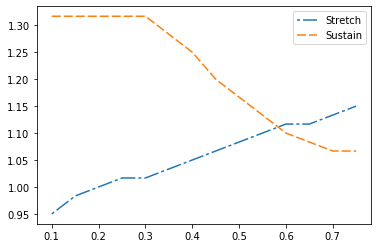

In [4]:
n = 0.4
n_temp = n
n_array = np.arange(0.1, 0.8, 0.05)
B_str_array = np.zeros(len(n_array))
B_sus_array = np.zeros(len(n_array))
B_array = np.arange(30, 80, 1)
n = 0.1

for j, n_item in enumerate(n_array):
    n = n_item
    
    print(f"n = {n}", end=" ")
    
    s_array = np.zeros(len(B_array))
    sus_array = np.zeros(len(B_array))
    B_temp = B
    
    for i, item in enumerate(B_array):
        B = item
        s_array[i] = static_calc(output="no_stretch")
        sus_array[i] = static_calc(output="sustainability")
    
    B = B_temp
    B_str_array[j] = B_array[np.absolute(s_array).argmin()]
    B_sus_array[j] = B_array[np.absolute(sus_array).argmin()]
    
    print(B_str_array[j], end=" | ")
    print(B_sus_array[j])

n = n_temp

print(n)
print(B)


fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(n_array, B_str_array / Ht, label='Stretch')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(n_array, B_sus_array / Ht, dashes=[6, 2], label='Sustain')

ax.legend()
plt.show()

In [5]:
0.5 * 2.4 * 60 * 60 * 10

43200.0

In [6]:
2.4 * 60 * 60 * 10 * (60 - 3 * 26 + 0.4 * 60) / 6

86400.0

In [7]:
86400 / 43200

2.0

In [8]:
sqrt1n = sqrt(1 + n ** 2)
print(n)
print(b)
sqrt1n

0.4
9.0


1.077032961426901

In [9]:
2.4 * 60 * (5 * 1.077 + 2 * 9) * 5

16837.199999999997

In [10]:
asd1 = 9 * (2 * 26 - 9 - 0.4 * 60)
asd1

171.0

In [11]:
asd2 = (26 - 9 - (0.4 * 60) / 2 - 5 * sqrt1n / 3) * 5 * sqrt1n
asd2

17.259157369005855

In [12]:
asd1 + asd2

188.25915736900586

In [13]:
#M2
-((asd1 + asd2) * 2.4 * 5 * 60)

-135546.59330568422

In [14]:
dc

1.6284727272727273

In [15]:
2.4 * 10 * 20 * 1.62

777.6

In [16]:
(26 - 0.4 * 60 - 2) * -2.4 * 10 * 20 * 1.62

-0.0

In [17]:
43200 + 16837 + 777.6

60814.6

In [18]:
86400 - 2259 

84141

In [19]:
60814 / 746 - 84141 * 34 / 238017

69.50082290177282